<a href="https://colab.research.google.com/github/robinrb7/TransferLearning_FeatureTuning/blob/main/Tranfer_Learning__Fine(model_3_Tuning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_ref= zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-01-08 17:00:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  22.5MB/s    in 8.1s    

2025-01-08 17:00:48 (19.8 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [11]:
import datetime
import tensorflow as tf

def create_tensorboard_callback(dir_name, exp_name):
  log_dir = dir_name + "/" + exp_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tesnsorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving tensorborad log files to : {log_dir}")
  return tesnsorboard_callback

In [ ]:
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories in {len(filenames)} images in '{dirpath}' .")

There are 2 directories in 0 images in '10_food_classes_10_percent' .
There are 10 directories in 0 images in '10_food_classes_10_percent/train' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/grilled_salmon' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/chicken_wings' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/chicken_curry' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/fried_rice' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/steak' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/ice_cream' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/sushi' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/hamburger' .
There are 0 directories in 75 images in '10_food_classes_10_percent/train/pizza' .
There are 0 directories in 75 images in '10_food_classes_10_percent/

In [ ]:
train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'

In [ ]:
import tensorflow as tf

train_data = tf.keras.utils.image_dataset_from_directory(directory = train_dir,
                                                                 image_size = (224,224),
                                                                 label_mode="categorical",
                                                                 batch_size=32)
test_data = tf.keras.utils.image_dataset_from_directory(directory = test_dir,
                                                                image_size=(224,224),
                                                                label_mode="categorical",
                                                                batch_size =32)

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)

base_model.trainalble = False

inputs = tf.keras.layers.Input(shape = (224,224,3),name="input_layer")
x= base_model(inputs)
print(f"shape after passing input into base model : {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"shape after global average poooling layer : {x.shape}")

outputs = tf.keras.layers.Dense(10,activation = "softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs,outputs)



24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
shape after passing input into base model : (None, 7, 7, 1280)
shape after global average poooling layer : (None, 1280)


In [ ]:
model_0.compile(loss="categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch= len(train_data),
                        validation_data = test_data,
                        validation_steps = int(0.25 * len(test_data)),
                        callbacks = [create_tensorboard_callback(dir_name="transfer_learning",
                                                                 exp_name="10_percent_featureExtraction")])

Saving tensorborad log files to : transfer_learning/10_percent_featureExtraction/20250108-171002
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.4146 - loss: 1.8243 - val_accuracy: 0.7730 - val_loss: 0.7478
Epoch 2/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7928 - val_loss: 0.7307
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 34s 187ms/step - accuracy: 0.8742 - loss: 0.4515 - val_accuracy: 0.7632 - val_loss: 0.6688
Epoch 4/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7780 - val_loss: 0.6541
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 10s 425ms/step - accuracy: 0.9550 - loss: 0.1683 - val_accuracy: 0.8676 - val_loss: 0.4430


In [ ]:
model_0.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.8003 - loss: 0.6700


[0.6719297766685486, 0.798799991607666]

In [ ]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, None, None, 3)  │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, None, None, 3)  │              0 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, None, None, 32) │            864 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, None, None, 32) │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, None, None, 32) │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_conv      │ (None, None, None, 16) │          4,608 │ stem_activation[0][0]  │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_bn        │ (None, None, None, 16) │             64 │ block1a_project_conv[… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_project_activati… │ (None, None, None, 16) │              0 │ block1a_project_bn[0]… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_conv       │ (None, None, None, 64) │          9,216 │ block1a_project_activ… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_bn         │ (None, None, None, 64) │            256 │ block2a_expand_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_expand_activation │ (None, None, None, 64) │              0 │ block2a_expand_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_conv      │ (None, None, None, 32) │          2,048 │ block2a_expand_activa… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2a_project_bn        │ (None, None, None, 32) │            128 │ block2a_project_conv[… │
│ (BatchNormalization) 

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,858,704 (22.35 MB)

 Non-trainable params: 60,608 (236.75 KB)

In [ ]:
model_0.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetv2-b0 (Functional)       │ (None, 7, 7, 1280)          │       5,919,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling_layer         │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │          12,810 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,675,152 (67.43 MB)

 Trainable params: 5,871,514 (22.40 MB)

 Non-trainable params: 60,608 (236.75 KB)

 Optimizer params: 11,743,030 (44.80 MB)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_loss_curves(history):

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  loss =history.history["loss"]
  val_loss = history.history["val_loss"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

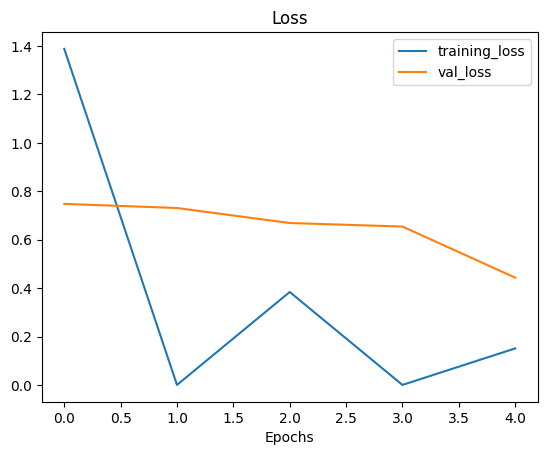

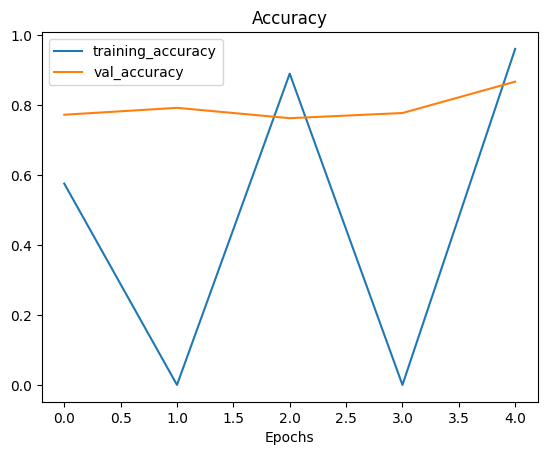

In [ ]:
plot_loss_curves(history_0)

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip

zip_ref =zipfile.ZipFile("10_food_classes_1_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-01-08 21:51:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.12.207, 172.217.194.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.12.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M  19.0MB/s    in 7.8s    

2025-01-08 21:51:30 (16.2 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
train_dir = "/content/10_food_classes_1_percent/train/"
test_dir = "/content/10_food_classes_1_percent/test/"

In [ ]:
import tensorflow as tf

train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                                 image_size=(224,224),
                                                                 label_mode="categorical",
                                                                 batch_size=32)

test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                                 image_size=(224,224),
                                                                 label_mode="categorical",
                                                                 batch_size=32)



Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
],name="data_augmentation")



(-0.5, 474.5, 311.5, -0.5)

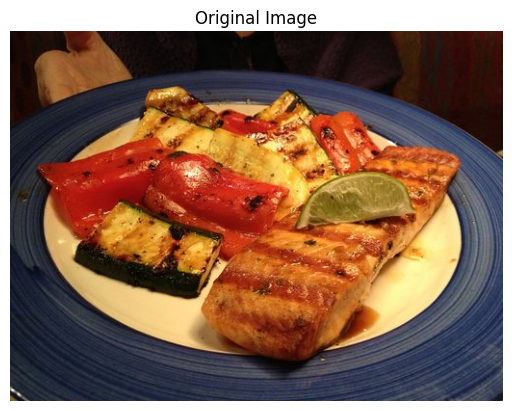

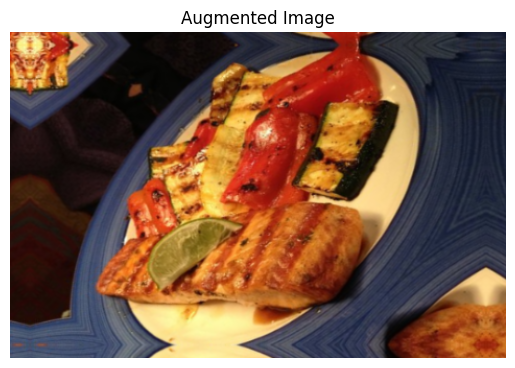

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os


target_class = random.choice(train_data.class_names)
target_dir = "/content/10_food_classes_1_percent/train/" + target_class
random_img = random.choice(os.listdir(target_dir))
random_img_path = target_dir + "/" + random_img

img = mpimg.imread(random_img_path)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

augmented_img = data_augmentation(img,training=True)
plt.figure()
plt.imshow(augmented_img/255.)
plt.title("Augmented Image")
plt.axis("off")


##Model 1: Feature extraction transfer learning on 1% of the data with data augmentation

In [ ]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable=False

inputs = tf.keras.layers.Input(shape =(224,224,3),name ="input_layer")
x = data_augmentation(inputs)
x = base_model(x,training =False)

x = tf.keras.layers.GlobalAveragePooling2D(name="average_global_layer")(x)

outputs = tf.keras.layers.Dense(10,activation="softmax",name="output_layer")(x)

model_1 = tf.keras.Model(inputs,outputs)


In [ ]:
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(0.25*len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="tranfer_learning",
                                                               exp_name="1%data_data_aug")])

Saving tensorborad log files to : tranfer_learning/1%data_data_aug/20250108-215247
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.0897 - loss: 2.4213 - val_accuracy: 0.1776 - val_loss: 2.1995
Epoch 2/5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 352ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.1826 - val_loss: 2.1991
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 768ms/step - accuracy: 0.1827 - loss: 2.1789 - val_accuracy: 0.2632 - val_loss: 2.0855
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 328ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2599 - val_loss: 2.0783
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2906 - loss: 2.0104 - val_accuracy: 0.3088 - val_loss: 1.9997


In [1]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
zip_ref= zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2025-01-10 16:36:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.130.207, 74.125.68.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.130.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M  21.9MB/s    in 8.5s    

2025-01-10 16:37:08 (19.0 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
import os

for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories in {len(filenames)} images in '{dirpath}' .")

There are 2 directories in 0 images in '10_food_classes_10_percent' .
There are 10 directories in 0 images in '10_food_classes_10_percent/test' .
There are 0 directories in 250 images in '10_food_classes_10_percent/test/sushi' .
There are 0 directories in 250 images in '10_food_classes_10_percent/test/chicken_curry' .
There are 0 directories in 250 images in '10_food_classes_10_percent/test/chicken_wings' .
There are 0 directories in 250 images in '10_food_classes_10_percent/test/ramen' .
There are 0 directories in 250 images in '10_food_classes_10_percent/test/steak' .
There are 0 directories in 250 images in '10_food_classes_10_percent/test/grilled_salmon' .
There are 0 directories in 250 images in '10_food_classes_10_percent/test/ice_cream' .
There are 0 directories in 250 images in '10_food_classes_10_percent/test/fried_rice' .
There are 0 directories in 250 images in '10_food_classes_10_percent/test/hamburger' .
There are 0 directories in 250 images in '10_food_classes_10_percent/

In [3]:
train_dir ="/content/10_food_classes_10_percent/train/"
test_dir = "/content/10_food_classes_10_percent/test"

In [18]:
import tensorflow as tf


train_data = tf.keras.utils.image_dataset_from_directory(train_dir,
                                                          image_size =(224,224),
                                                          label_mode ="categorical",
                                                          )
test_data = tf.keras.utils.image_dataset_from_directory(test_dir,
                                                          image_size =(224,224),
                                                          label_mode ="categorical",
                                                          )

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [19]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2)
], name = "data_augmentation")

In [44]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainalble = False

inputs = layers.Input(shape=(224,224,3),name="input_layer")

x = data_augmentation(inputs)
x = base_model(x,training=False)

x = layers.GlobalAveragePooling2D(name="global_average_layer")(x)

outputs = layers.Dense(10,activation="softmax",name="output_layer")(x)

model_2 = tf.keras.Model(inputs,outputs)



In [7]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [8]:
checkpoint_path ="ten_percent_model_checkpoints_weights/checkpoint.weights.h5"

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path,
                                                         save_weights_only = True,
                                                         save_best_only=False,
                                                         save_freq="epoch",
                                                         verbose=1)

In [12]:
history_2  =  model_2.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps= len(test_data),
                          callbacks = [create_tensorboard_callback(dir_name="tranfer_learning",
                                                                   exp_name="10_percent_data_aug"),
                                       checkpoint_callback])

Saving tensorborad log files to : tranfer_learning/10_percent_data_aug/20250110-163749
Epoch 1/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step - accuracy: 0.3282 - loss: 1.9035
Epoch 1: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 66s 882ms/step - accuracy: 0.3338 - loss: 1.8905 - val_accuracy: 0.6764 - val_loss: 1.0145
Epoch 2/5

Epoch 2: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step - accuracy: 0.7753 - loss: 0.6675
Epoch 3: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 29s 659ms/step - accuracy: 0.7754 - loss: 0.6683 - val_accuracy: 0.6300 - val_loss: 1.5437
Epoch 4/5

Epoch 4: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/5
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.8664 - loss: 0.4184
Epoch 5: saving model to ten_percent_model_checkpoints_weights/checkpoint.weights.h5
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 653ms/step - accuracy: 0.8666 - loss: 0.4177 - val_accuracy: 0.7440 - val_loss: 0.8731


In [26]:
model_2.layers

[<InputLayer name=input_layer, built=True>,
 <Sequential name=data_augmentation, built=True>,
 <Functional name=efficientnetb0, built=True>,
 <GlobalAveragePooling2D name=global_average_layer, built=True>,
 <Dense name=output_layer, built=True>]

In [48]:
base_model.trainable = True

# Freeze all layers except the last 10 layers of the base model
for layer in base_model.layers[:-10]:
    layer.trainable = False

# Verify the layer trainable statuses
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, "Trainable:", layer.trainable)

0 input_layer_5 Trainable: False
1 rescaling_6 Trainable: False
2 normalization_3 Trainable: False
3 rescaling_7 Trainable: False
4 stem_conv_pad Trainable: False
5 stem_conv Trainable: False
6 stem_bn Trainable: False
7 stem_activation Trainable: False
8 block1a_dwconv Trainable: False
9 block1a_bn Trainable: False
10 block1a_activation Trainable: False
11 block1a_se_squeeze Trainable: False
12 block1a_se_reshape Trainable: False
13 block1a_se_reduce Trainable: False
14 block1a_se_expand Trainable: False
15 block1a_se_excite Trainable: False
16 block1a_project_conv Trainable: False
17 block1a_project_bn Trainable: False
18 block2a_expand_conv Trainable: False
19 block2a_expand_bn Trainable: False
20 block2a_expand_activation Trainable: False
21 block2a_dwconv_pad Trainable: False
22 block2a_dwconv Trainable: False
23 block2a_bn Trainable: False
24 block2a_activation Trainable: False
25 block2a_se_squeeze Trainable: False
26 block2a_se_reshape Trainable: False
27 block2a_se_reduce Trai

In [49]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

In [50]:
print(len(model_2.trainable_variables))

12


In [52]:
fine_tune_epochs = 5 + 5
history_fine_tune_data_aug = model_2.fit(train_data,
                                         epochs=fine_tune_epochs,
                                         steps_per_epoch=len(train_data),
                                         validation_data=test_data,
                                         validation_steps = int(0.25*len(test_data)),
                                         initial_epoch = history_2.epoch[-1],
                                         callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                                exp_name="10_percent_fine_tune")])

Saving tensorborad log files to : transfer_learning/10_percent_fine_tune/20250110-170631
Epoch 5/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 385ms/step - accuracy: 0.1362 - loss: 2.2854 - val_accuracy: 0.3799 - val_loss: 1.9408
Epoch 6/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3947 - val_loss: 1.9280
Epoch 7/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 14s 208ms/step - accuracy: 0.4444 - loss: 1.8831 - val_accuracy: 0.5740 - val_loss: 1.5977
Epoch 8/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5658 - val_loss: 1.5970
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 20s 881ms/step - accuracy: 0.6389 - loss: 1.5359 - val_accuracy: 0.7353 - val_loss: 1.1995
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6760 - val_loss: 1.2524
